# quickie check / test for quad grid

NOTE: this is only a bit of a prototype for visualation -- not all that useful.



In [10]:
%matplotlib inline
from matplotlib import pyplot as plt

In [11]:
import numpy as np
def curv_grid(n_x=4, n_y=12, center=(20.0, 30.0), min_radius=1.0, max_radius=1.1,angle = np.pi / 2.0):
    """
    example of quad grid of a partial circle to use for tests
    """

    lon = np.zeros((n_y, n_x), dtype=np.float64)
    lat = np.zeros((n_y, n_x), dtype=np.float64)

    for i, theta in enumerate(np.linspace(0, angle, n_x)):
        for j, r in enumerate(np.linspace(min_radius, max_radius, n_y)):
            # print(np.cos(theta))
            lon[j, i] = center[1] + r * np.cos(theta)
            lat[j, i] = center[0] + r * np.sin(theta)
    return lon, lat
 
def nodes_from_coords(x, y):
    """
    generates nodes and indeces for the cells from arrays of x and y nodes_from_coords
    """
    nodes = np.ascontiguousarray(np.column_stack((x[:].reshape(-1),
                                                          y[:].reshape(-1)))).astype(np.float64)
    y_size, x_size = x.shape
    faces = np.array([np.array([[x, x + 1, x + x_size + 1, x + x_size]
                                        for x in range(0, x_size - 1, 1)]) + y * x_size for y in range(0, y_size - 1)])
    faces = np.ascontiguousarray(faces.reshape(-1, 4).astype(np.int32))

    return nodes, faces



In [12]:
lon, lat = curv_grid()

/var/folders/7t/137hx7xn4s1fdqvjj1bhtdhrz84cy3/T/ipykernel_16292/368365258.py:3: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  ax.pcolormesh(lon, lat, lon, edgecolors="k")


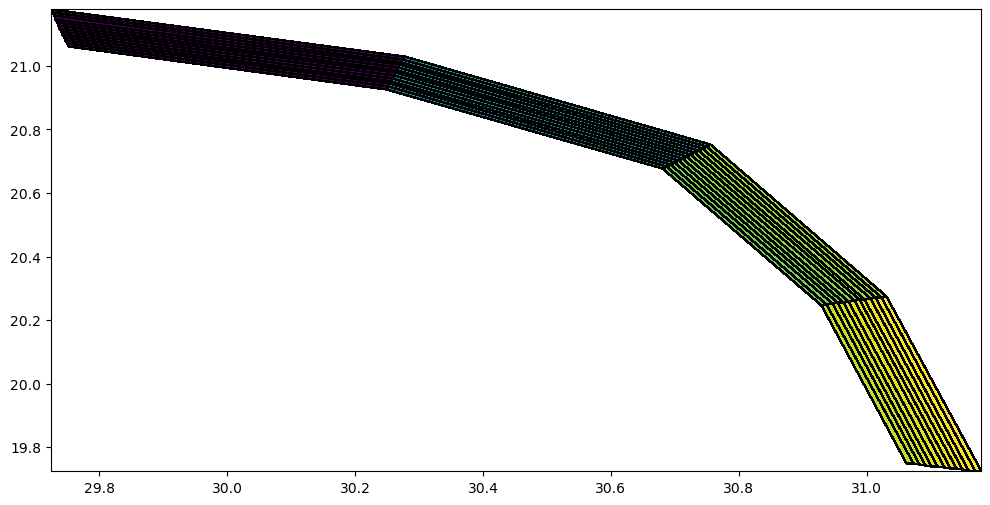

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
ax.pcolormesh(lon, lat, lon, edgecolors="k")

In [14]:
nodes, faces = nodes_from_coords(lon, lat)

In [15]:
# ax.patch(nodes[:, 0], nodes[:, 1], "b")

In [16]:
cell0 = nodes[faces[0]]

In [17]:
cell0

array([[31.        , 20.        ],
       [30.8660254 , 20.5       ],
       [30.87389836, 20.50454545],
       [31.00909091, 20.        ]])

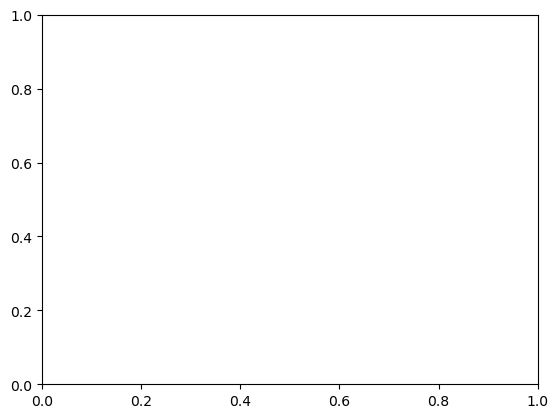

In [18]:
# hmm -- not plotting -- why not?

fig2, ax2 = plt.subplots()
ax.plot(cell0[:, 0], cell0[:, 1])
